<h1>Running Susceptible Infected Recovered (SIR)</h1>

In [1]:
import sys
#add the path were the models are
sys.path.append("../main/")
import pandas as pd
import numpy as np
from modelos import SIR
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

<h2>How to use</h2>

<p>The easiest way to use SIR model is calling it on three basic information:</p>
<ul>
    <li>The population size</li>
    <li>Days since the first report of infection</li>
    <li>A series with the cummulative number of cases</li>
    </ul>
<p>To ilustrate it we will use the series of covid-19 notified in Sao Paulo, Brazil</p>

In [2]:
#Read data directly from wesley site
data = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

data.head()

,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
#Select only Sao Paulo
sp = data[["date","state", "totalCases", "deaths"]][data["state"] == "SP"]

In [4]:
#Change date column to date format
sp["date"] = pd.to_datetime(sp["date"])

In [5]:
#Using the population of SP for 2020
model = SIR(tamanhoPop = 43993159) 

In [6]:
#create a series with the cummulative number of cases
y = sp["totalCases"]

#Give the number of days since the day of first case confirmed
x = range(0, len(sp["totalCases"]))

<p>Than fit the model on data</p>

In [7]:
#fit model using data
model.fit(x = x, y = y)

pyswarms.single.local_best:   0%|          |0/500../main/modelos.py:156: RuntimeWarning: overflow encountered in exp
  h = 1.0/(1.0+ np.exp(-2.0*50*t))
pyswarms.single.local_best: 100%|██████████|500/500, best_cost=114   


In [8]:
#create the new series to be predicted
newX = range(0,len(y) + 7) #change the value to change the ammount of days to be predicted

#make projections
predicted = model.predict(newX)

In [9]:
#Create a time series to join data
df = pd.DataFrame.from_dict({"date": pd.date_range(start = "2020-02-25", end = "2020-06-04")})
df["predicted"] = predicted

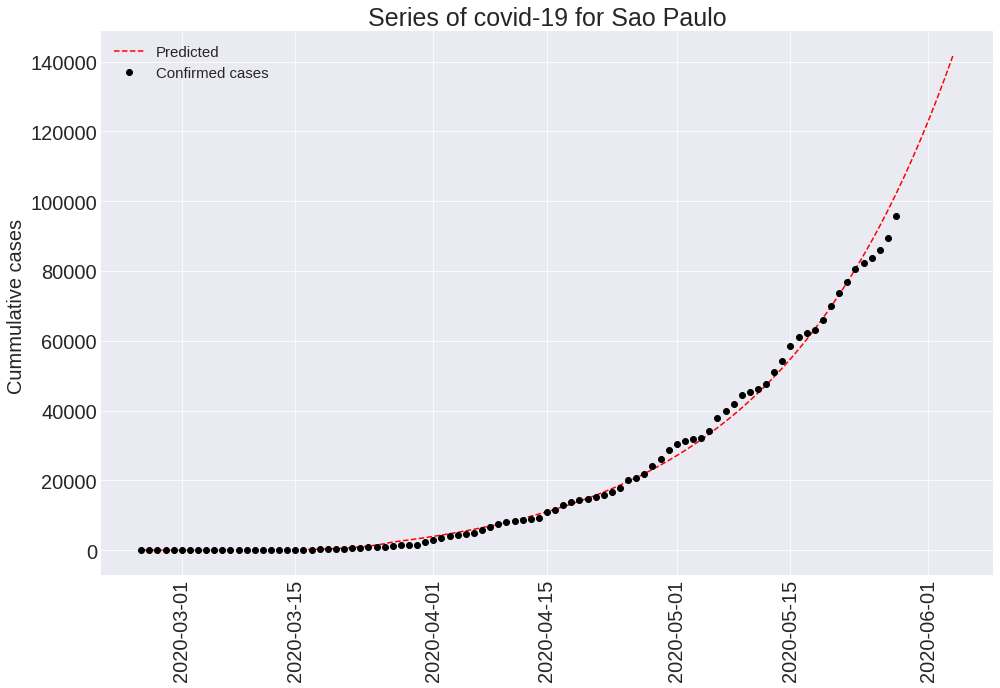

In [10]:
# Create figure and plot space
fig, ax = plt.subplots(figsize = (16,10))

ax.set_title("Series of covid-19 for Sao Paulo", fontsize = 25)
ax.set_ylabel('Cummulative cases ',fontsize = 20)


ax.plot(df["date"], df["predicted"], c = "r", linestyle = "--", label = "Predicted")
ax.plot(sp["date"], sp["totalCases"], "ko", label = "Confirmed cases")
plt.xticks(rotation = 90)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.legend(loc='upper left',fontsize = 15)